# Web Application for Landmark Detection

- Build a web application that can detect landmarks in images using a pre-trained model provided by Tensorflow-Hub on [Kaggle](https://www.kaggle.com/models/google/landmarks/tensorFlow1/classifier-asia-v1).
- The Variation of the model is `classifier-asia-v1`.

### Improting Libraries


In [6]:
# Importing the basic libraries
import numpy as np
import pandas as pd

import PIL.Image as Image
import tensorflow as tf
import tensorflow_hub as hub # type: ignore


**Load the model**

In [7]:
TF_MODEL_URL = 'https://tfhub.dev/google/on_device_vision/classifier/landmarks_classifier_asia_V1/1'
LABEL_MAP_URL = 'https://www.gstatic.com/aihub/tfhub/labelmaps/landmarks_classifier_asia_V1_label_map.csv'
IMAGE_SHAPE = (321, 321)

In [27]:
classifier = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=IMAGE_SHAPE+(3,)),
    tf.keras.layers.Lambda(lambda x: hub.KerasLayer(TF_MODEL_URL, output_key='predictions:logits')(x))
])


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [28]:
df = pd.read_csv(LABEL_MAP_URL)

In [29]:
label_map = dict(zip(df.id, df.name))

In [30]:
img_loc = "images/image2.jpeg"

In [31]:
img = Image.open(img_loc).resize(IMAGE_SHAPE)

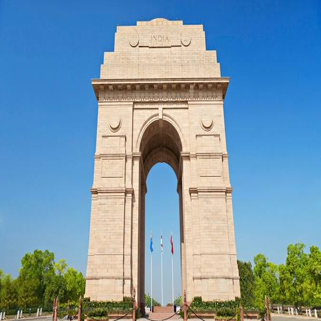

In [32]:
img

In [33]:
img = np.array(img)/255.0
img.shape

(321, 321, 3)

In [34]:
img = img[np.newaxis, ...]

In [35]:
img.shape

(1, 321, 321, 3)

In [38]:
result = classifier.predict(img)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


In [39]:
result

array([[ 0.11049077,  0.09116428,  0.00659586, ..., -0.1137985 ,
         0.0403024 , -0.04766773]], dtype=float32)

In [40]:
label_map[np.argmax(result)]

'India Gate'

**Define prediction Function**

In [41]:
class_names=list(label_map.values())

In [42]:
def classify_image(image):
    img = np.array(image)/255.0
    img = img[np.newaxis, ...]
    prediction = classifier.predict(img)
    return label_map[np.argmax(prediction)]

**Streamlit UI in few lines of code!**

In [ ]:
import streamlit as st

# Streamlit app
st.title("Landmark Detection Web App")

uploaded_file = st.file_uploader("Choose an image...", type="jpeg")

if uploaded_file is not None:
    image = Image.open(uploaded_file).resize(IMAGE_SHAPE)
    st.image(image, caption='Uploaded Image.', use_column_width=True)
    st.write("")
    st.write("Classifying...")
    label = classify_image(image)
    st.write(f"Prediction: {label}")